In [1]:
import math as math
import numpy as np
import scipy as scipy
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import sys
import os

from qutip import *
from src_2_0 import *

In [2]:
### General parameters ###

g_0 = 0.01 # Light-matter coupling
C = np.linspace(1e-15,2,30) # Cooperativity (equal to the pumping parameter p)
delta_c = 1 # Detuning w_c-w_p

### Squeezed parameters ###

theta = np.pi # Squeezing angle

In [3]:
a = open('10_0.50.txt','r')

data_10 = a.readlines()

n_10 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_10[i] = data_10[i].split()
    n_10[i]=data_10[i][1]

a.close()

In [4]:
b = open('50_0.50.txt','r')

data_50 = b.readlines()

n_50 = np.zeros(np.size(C),dtype=complex)


for i in range(C.size):
    data_50[i] = data_50[i].split()
    n_50[i]=data_50[i][1]

b.close()

In [5]:
c = open('100_0.50.txt','r')

data_100 = c.readlines()

n_100 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_100[i] = data_100[i].split()
    n_100[i]=data_100[i][1]

c.close()

In [6]:
d = open('200_0.50.txt','r')

data_200 = d.readlines()

n_200 = np.zeros(np.size(C),dtype=complex)
fluc_1 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_200[i] = data_200[i].split()
    n_200[i]=data_200[i][1]
    fluc_1[i]=data_200[i][2]

d.close()

In [22]:
def mfs(r,n_q):### General result of the mean field solution ###

    alpha = (np.e**(4*r)-1)/(np.e**(4*r)+1) # omega_p/delta_c
    omega_p = alpha*delta_c # Amplitude of the coherent drive (down-conversion)
    delta_s = delta_c*np.sqrt(1-(omega_p/delta_c)**2) # Detuning in the squeezed basis
    delta_sigma = delta_s # Detuning w_sigma-w_p (the same as delta_s to apply RWA)

    R = 1/(2*n_q) # Rename some constantes for a more compact expression
    mu = -(delta_s+R*delta_sigma)/(R+1)
    g_tilda = g_0*np.cosh(r)
    N_S = 0.5+(1/(2*g_tilda**2))*(R*((delta_s-delta_sigma)/(R+1))**2+(2*n_q*(g_0*np.sqrt(2/(C*n_q)))**2)/4)
    return ((1/R)*(1-N_S)*np.heaviside(1-N_S,0)/1)*np.cosh(2*r)+np.sinh(r)**2 # Mean-field solution

In [8]:
r_1 = 0.5

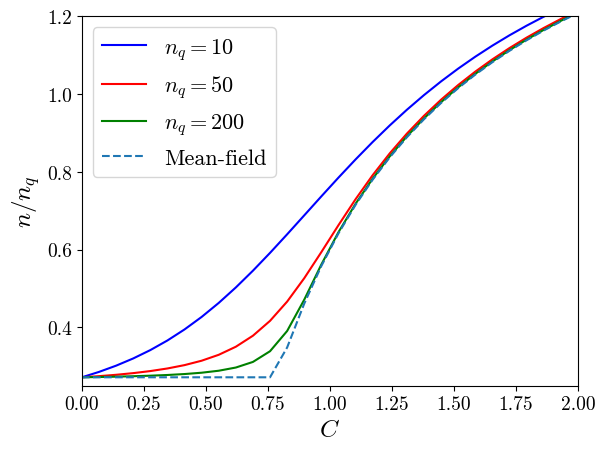

In [20]:
fig1,ax1 = plt.subplots()
ax1.plot(C,((n_10/10)*np.cosh(2*r_1)+np.sinh(r_1)**2),'b',label='$n_q=10$')
ax1.plot(C,((n_50/50)*np.cosh(2*r_1)+np.sinh(r_1)**2),'r',label='$n_q=50$')
ax1.plot(C,((n_200/200)*np.cosh(2*r_1)+np.sinh(r_1)**2),'g',label='$n_q=200$')
ax1.plot(C,mfs(r_1,200),'--',label='Mean-field')
plt.xlim([np.min(C),np.max(C)])
plt.ylim([0.25,1.2])
plt.xlabel('$C$')
plt.ylabel('$n/n_q$')
plt.legend()
plt.show()
fig1.savefig('TD_LIMIT.png',dpi=500)


In [10]:
r_2 = 0.75
r_3 = 1

In [11]:
e = open('200_1.00.txt','r')

data_200_3 = e.readlines()

n_200_3 = np.zeros(np.size(C),dtype=complex)
fluc_3 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_200_3[i] = data_200_3[i].split()
    n_200_3[i]=data_200_3[i][1]
    fluc_3[i]=data_200_3[i][2]

e.close()

In [12]:
f = open('200_0.75.txt','r')

data_200_2 = f.readlines()

n_200_2 = np.zeros(np.size(C),dtype=complex)
fluc_2 = np.zeros(np.size(C),dtype=complex)

for i in range(C.size):
    data_200_2[i] = data_200_2[i].split()
    n_200_2[i]=data_200_2[i][1]
    fluc_2[i]=data_200_2[i][2]

f.close()

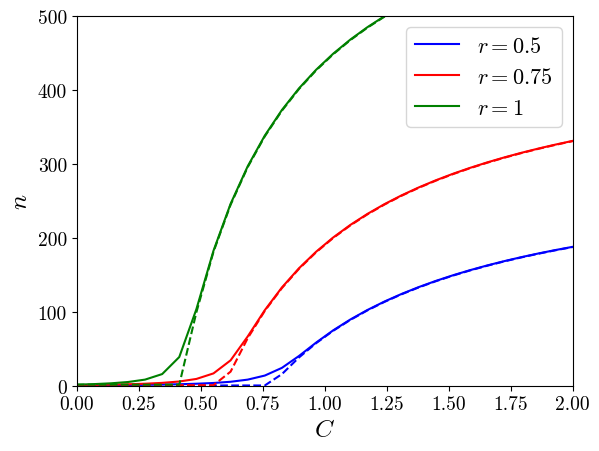

In [23]:
fig2,ax2 = plt.subplots()
ax2.plot(C,((n_200)*np.cosh(2*r_1)+np.sinh(r_1)**2),'b',label='$r=0.5$')
ax2.plot(C,((n_200_2)*np.cosh(2*r_2)+np.sinh(r_2)**2),'r',label='$r=0.75$')
ax2.plot(C,((n_200_3)*np.cosh(2*r_3)+np.sinh(r_3)**2),'g',label='$r=1$')
ax2.plot(C,mfs(r_1,200),'b--')
ax2.plot(C,mfs(r_2,200),'r--')
ax2.plot(C,mfs(r_3,200),'g--')
plt.xlim([np.min(C),np.max(C)])
plt.ylim([0,500])
plt.xlabel('$C$')
plt.ylabel('$n$')
plt.legend()
plt.show()
fig2.savefig('lasing_transition.png',dpi=500)

c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rodri\anaconda3\envs\myenv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


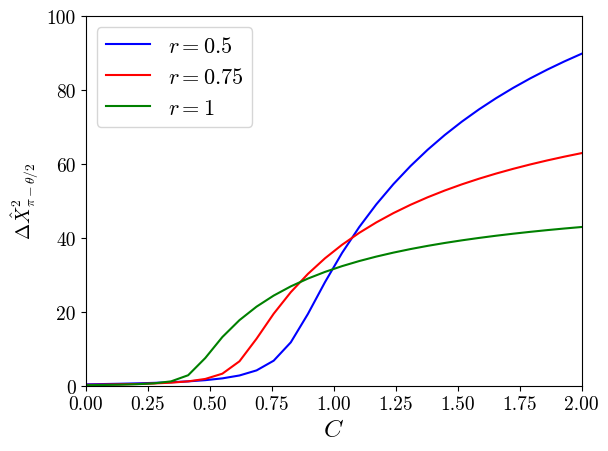

In [203]:
fig4,ax4 = plt.subplots()
ax4.plot(C,fluc_1,'b',label='$r=0.5$')
ax4.plot(C,fluc_2,'r',label='$r=0.75$')
ax4.plot(C,fluc_3,'g',label='$r=1$')
plt.xlim([np.min(C),np.max(C)])
plt.ylim([0,100])
plt.xlabel('$C$')
plt.ylabel(r'$\Delta\hat{X}^2_{\pi-\theta/2}$',fontsize=14)
plt.legend()
plt.show()
fig4.savefig('fluctuation_SS.png',dpi=500)

In [3]:
def r_e(r,eta):
    return r+0.5*np.arcsinh(eta*np.sinh(2*r))

In [4]:
def N_s_2(r,eta):
    return 0.5*(2*eta*np.sinh(r)**2+np.sqrt(1+eta**2*np.sinh(2*r)**2)-1)

In [5]:
def N_s(r,eta):
    return eta*(np.sinh(r)**2+0.25*eta*np.sinh(2*r)**2)

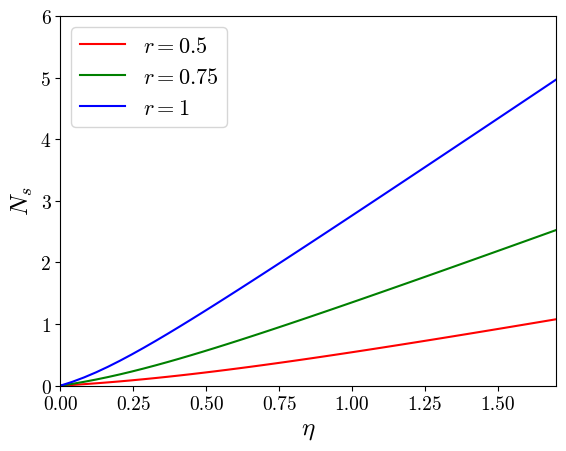

In [201]:
fig3,ax3 = plt.subplots()
ax3.plot(np.linspace(0,2),N_s_2(0.5,np.linspace(0,2)),'r',label='$r=0.5$')
ax3.plot(np.linspace(0,2),N_s_2(0.75,np.linspace(0,2)),'g',label='$r=0.75$')
ax3.plot(np.linspace(0,2),N_s_2(1,np.linspace(0,2)),'b',label='$r=1$')
plt.xlim([0,1.7])
plt.ylim([0,6])
plt.xlabel('$\eta$')
plt.ylabel('$N_s$')
plt.legend()
plt.plot()
fig3.savefig('aprox.png',dpi=500)

In [6]:
Z = np.meshgrid(np.linspace(0,1),np.linspace(0.01,1.5))

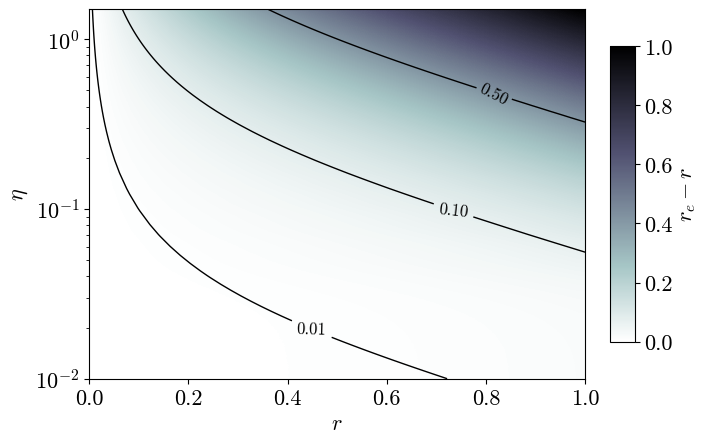

In [8]:
fig5,ax5 = plt.subplots()
cbar = fig5.colorbar(cm.ScalarMappable(cmap=cm.bone_r),cax = ax5.inset_axes([1.05, 0.1, 0.05, 0.8]))
cbar.set_label('$r_e-r$',fontsize=16)
ax5.imshow(r_e(Z[0],np.flip(Z[1]))-np.meshgrid(np.linspace(0,1),np.linspace(0,1))[0],cmap=cm.bone_r,interpolation='gaussian',extent=[0,1,0.01,1.5], aspect='auto')
levels = [0.01, 0.1, 0.5]
contours = ax5.contour(Z[0],np.flip(Z[1]),r_e(Z[0],np.flip(Z[1]))-np.meshgrid(np.linspace(0,1),np.linspace(0,1))[0], levels=levels, colors='black', linewidths=1)
ax5.clabel(contours, inline=True, fontsize=12, fmt="%.2f")
plt.yscale('log')
plt.ylabel('$\eta$')
plt.xlabel('$r$')
plt.plot()
fig5.savefig('aprox_2.png',dpi=500, bbox_inches = 'tight')